In [1]:
#importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
from sklearn.datasets import load_iris 
df=load_iris()
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [21]:
data = pd.DataFrame(df.data, columns=df.feature_names) 
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [23]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(data)
scaled_features=scaler.transform(data)

In [27]:
dataframe=pd.DataFrame(scaled_features)
dataframe.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [28]:
from sklearn.model_selection import train_test_split 
x=df.data
y=df.target 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [29]:
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier(n_neighbors=1) 
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
p = knn.predict(x_test)
print(p)

[0 0 1 2 2 1 1 1 0 1 1 1 0 1 1 1 0 2 1 0 1 2 1 1 1 0 0 2 0 2 2 0 1 0 0 2 2
 2 2 0 2 1 1 0 1]


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,p)
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        17
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [32]:
e=[]
for i in range(1,60):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    p=KNN.predict(x_test)
    e.append(np.mean(p!=y_test)) 
print(e)

[0.044444444444444446, 0.044444444444444446, 0.022222222222222223, 0.06666666666666667, 0.044444444444444446, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.044444444444444446, 0.08888888888888889, 0.044444444444444446, 0.06666666666666667, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.022222222222222223, 0.0, 0.022222222222222223, 0.06666666666666667, 0.06666666666666667, 0.08888888888888889, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.08888888888888889, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.08888888888888889, 0.1111111111111111, 0.08888888888888889, 0.08888888888888889, 0.08888888888888889, 0.1111111111111111, 0.1111111111111111, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333

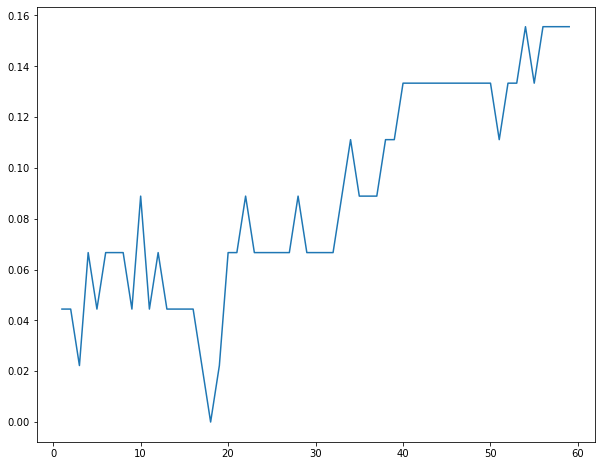

In [33]:
plt.figure(figsize=(10,8))
plt.plot(range(1,60),e)

In [34]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
print('FOR K=10')
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

FOR K=10
[[14  0  0]
 [ 1 14  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.78      0.82      0.80        17
           2       0.83      0.71      0.77        14

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.84        45
weighted avg       0.84      0.84      0.84        45

